In [197]:
#import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import datetime
import re 
import os
import plotly.express as px
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from matplotlib.pyplot import figure


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zengmengyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [198]:
pip install -U protobuf

Note: you may need to restart the kernel to use updated packages.


In [199]:
!pip install wordcloud

## Data understanding

In [200]:
filenames=[
'ICLR2017_affiliations.tsv',
'ICLR2017_paperlist.tsv',
'ICLR2018_affiliations.tsv',
'ICLR2018_paperlist_v2.tsv',
'ICLR2019_affiliations.tsv',
'ICLR2019_paperlist.tsv',
'ICLR2020_affiliations.tsv',
'ICLR2020_paperlist.tsv',
'ICLR2021_affiliations.tsv',
'ICLR2021_paperlist.tsv'] 

In [201]:
for i in filenames:
    data = pd.read_csv(i,sep='\t',header=0, index_col=0)
    #print(os.path.basename(i)) #https://datascienceparichay.com/article/python-get-filename-from-path-with-examples/
    #print (data.info())

# Data preparation

# affiliation

In [202]:
aff17 = pd.read_csv('ICLR2017_affiliations.tsv',sep='\t',header=0,index_col=0)
aff18 = pd.read_csv('ICLR2018_affiliations.tsv',sep='\t',header=0,index_col=0)
aff19= pd.read_csv('ICLR2019_affiliations.tsv',sep='\t',header=0,index_col=0)
aff20= pd.read_csv('ICLR2020_affiliations.tsv',sep='\t',header=0,index_col=0)
aff21 = pd.read_csv('ICLR2021_affiliations.tsv',sep='\t',header=0,index_col=0)

In [203]:
aff21.describe(include='all')

,authorid,author_name,affiliation,emails
count,9673,9673,9660,9673
unique,6897,6785,1378,3328
top,~Sergey_Levine1,Sergey Levine,Google,****@gmail.com
freq,30,30,471,587


In [204]:
aff21.head()
# limitation:emails domain analysis is not useful and specific
# thinking: authorid as unikey

,authorid,author_name,affiliation,emails
0,~Manoj_Kumar1,Manoj Kumar,Google,"****@gmail.com, ****@google.com"
1,~Dirk_Weissenborn1,Dirk Weissenborn,Google,"****@dfki.de, ****@gmail.com, ****@google.com,..."
2,~Nal_Kalchbrenner1,Nal Kalchbrenner,NaN,****@google.com
3,~Jungo_Kasai1,Jungo Kasai,Paul G. Allen School of Computer Science & Eng...,****@cs.washington.edu
4,~Nikolaos_Pappas1,Nikolaos Pappas,"Department of Computer Science, University of ...","****@cs.washington.edu, ****@gmail.com, ****@a..."


In [205]:
aff17['affiliation'].value_counts().head(10).sort_values(ascending=False)

Google                               129
DeepMind                              81
Facebook                              61
University of Montreal                40
Microsoft                             39
University of California Berkeley     38
Google Brain                          23
Stanford University                   22
Carnegie Mellon University            20
New York University                   16
Name: affiliation, dtype: int64

### affiliation

### univariate

In [206]:
# the importance that iclr to top affiliation 
# top affiliation list from 2017 to 2021 
aff17df=aff17['affiliation'].value_counts().head(10).sort_values(ascending=False).index.to_list()
aff18df=aff18['affiliation'].value_counts().head(10).sort_values(ascending=False).index.to_list()
aff19df=aff19['affiliation'].value_counts().head(10).sort_values(ascending=False).index.to_list()
aff20df=aff20['affiliation'].value_counts().head(10).sort_values(ascending=False).index.to_list()
aff21df=aff21['affiliation'].value_counts().head(10).sort_values(ascending=False).index.to_list()
authorlist=list(set(aff17df)|set(aff18df)|set(aff19df)|set(aff20df)|set(aff21df))
authorlist

['DeepMind',
 'Microsoft',
 'Peking University',
 'University of California Berkeley',
 'Google',
 'Google Brain',
 'University of Oxford',
 'Korea Advanced Institute of Science and Technology',
 'University of Montreal',
 'Carnegie Mellon University',
 'Stanford University',
 'Massachusetts Institute of Technology',
 'University of California, Los Angeles',
 'Facebook',
 'New York University']

In [207]:
# the number of author from top affiliation participate in iclr
count17=[]
for i in authorlist:
    count17.append(aff17['affiliation'].value_counts()[i])
count17

[81, 39, 2, 38, 129, 23, 12, 5, 40, 20, 22, 15, 7, 61, 16]

In [208]:
count18=[]
for i in authorlist:
    count18.append(aff18['affiliation'].value_counts()[i])
count18

[128, 58, 28, 85, 241, 46, 25, 15, 51, 58, 69, 57, 16, 70, 26]

In [209]:
count19=[]
for i in authorlist:
    count19.append(aff19['affiliation'].value_counts()[i])
count19

[214, 111, 69, 137, 333, 39, 45, 45, 80, 102, 104, 125, 33, 100, 44]

In [210]:
count20=[]
for i in authorlist:
    count20.append(aff20['affiliation'].value_counts()[i])
count20

[239, 124, 84, 181, 458, 67, 99, 63, 65, 128, 178, 168, 91, 153, 68]

In [211]:
count21=[]
for i in authorlist:
    count21.append(aff21['affiliation'].value_counts()[i])
count21

[124, 185, 126, 261, 471, 55, 139, 136, 85, 156, 221, 190, 89, 159, 65]

In [212]:
data={'Affiliation':['Korea Advanced Institute of Science and Technology',
 'University of Oxford',
 'Google Brain',
 'Peking University',
 'Facebook',
 'Microsoft',
 'Stanford University',
 'University of California Berkeley',
 'Google',
 'University of Montreal',
 'Massachusetts Institute of Technology',
 'University of California, Los Angeles',
 'DeepMind',
 'New York University',
 'Carnegie Mellon University'],
'2017':[5, 12, 23, 2, 61, 39, 22, 38, 129, 40, 15, 7, 81, 16, 20]}
authorchange = pd.DataFrame(data)
authorchange['2018']=[15, 25, 46, 28, 70, 58, 69, 85, 241, 51, 57, 16, 128, 26, 58]
authorchange['2019']=[45, 45, 39, 69, 100, 111, 104, 137, 333, 80, 125, 33, 214, 44, 102]
authorchange['2020']=[63, 99, 67, 84, 153, 124, 178, 181, 458, 65, 168, 91, 239, 68, 128]
authorchange['2021']=[136, 139, 55, 126, 159, 185, 221, 261, 471, 85, 190, 89, 124, 65, 156]
authorchange# buss6002

,Affiliation,2017,2018,2019,2020,2021
0,Korea Advanced Institute of Science and Techno...,5,15,45,63,136
1,University of Oxford,12,25,45,99,139
2,Google Brain,23,46,39,67,55
3,Peking University,2,28,69,84,126
4,Facebook,61,70,100,153,159
5,Microsoft,39,58,111,124,185
6,Stanford University,22,69,104,178,221
7,University of California Berkeley,38,85,137,181,261
8,Google,129,241,333,458,471
9,University of Montreal,40,51,80,65,85


In [213]:
years=['2017', '2018', '2019', '2020', '2021']
for i in authorchange['Affiliation']:
    fig=px.line(authorchange,x=authorchange['Affiliation'], y=years)
    fig.update_layout(yaxis_title="Number of author engaged")
fig

# paperlist

In [214]:
# read in & inspect shape
paper17 = pd.read_csv('ICLR2017_paperlist.tsv',sep='\t',header=0,index_col=0)
paper18 = pd.read_csv('ICLR2018_paperlist_v2.tsv',sep='\t',header=0,index_col=0)
paper19= pd.read_csv('ICLR2019_paperlist.tsv',sep='\t',header=0,index_col=0)
paper20= pd.read_csv('ICLR2020_paperlist.tsv',sep='\t',header=0,index_col=0)
paper21 = pd.read_csv('ICLR2021_paperlist.tsv',sep='\t',header=0,index_col=0)

In [215]:
# add column 'year' then concat new whole df for 2017-2021
paper17['Year']='2017'
paper18['Year']='2018'
paper19['Year']='2019'
paper20['Year']='2020'
paper21['Year']='2021'
dfpaper = pd.concat([paper17,paper18,paper19,paper20,paper21])
dfpaper=dfpaper.drop(columns=["id","one-sentence_summary"])

In [216]:
dfpaper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7615 entries, 0 to 2594
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   forum      7615 non-null   object
 1   title      7615 non-null   object
 2   authors    7615 non-null   object
 3   authorids  7615 non-null   object
 4   abstract   7615 non-null   object
 5   keywords   7615 non-null   object
 6   decision   7578 non-null   object
 7   Rating     7615 non-null   object
 8   Year       7615 non-null   object
dtypes: object(9)
memory usage: 594.9+ KB


In [217]:
dfpaper.describe(include='all')

,forum,title,authors,authorids,abstract,keywords,decision,Rating,Year
count,7615,7615,7615,7615,7615,7615,7578,7615,7615
unique,7615,7596,7415,7331,7614,6574,9,1459,5
top,dnKsslWzLNY,Evaluations and Methods for Explanation throug...,"['Dani Kiyasseh', 'Tingting Zhu', 'David A. Cl...",['****@gmail.com'],There are time series that are amenable to rec...,[],Reject,"['6: Weak Accept', '6: Weak Accept', '6: Weak ...",2021
freq,1,2,5,20,2,674,4888,194,2595


In [218]:
# null value (decision)
dfpaper.isnull().sum()

forum         0
title         0
authors       0
authorids     0
abstract      0
keywords      0
decision     37
Rating        0
Year          0
dtype: int64

In [219]:
# clean 'decision'
dfpaper['decision'].nunique(dropna=False)

10

In [220]:
dfpaper['decision'].value_counts()

Reject                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [221]:
# clean 'decision' and 'abstract'
dfpaper['decision'].replace("This paper attempts to formalize a notion of creativity in generative models. The idea is to see if a generative model trained on one dataset can be used to generate novel samples that resemble elements of another dataset. In this case, it is examined whether a generative model trained on digits could be used to generate samples that look like alphabetical characters. Several metrics for determining the alphabetical nature of the generated samples are given; this is used as a proxy for novelty. It is shown that these can be useful in choosing models that generate novel samples outside of the classes the model was initially trained on.\n\nI can agree with the premise that when it comes to out-of-class novelty, likelihood is probably not a good measure since it will penalize models that generate samples that are too far outside of the data distribution. However, I'm not  yet convinced that the conclusions drawn here would generalize beyond the specific examples given in the paper. It would be good in a future iteration to see this same analysis on another dataset, or perhaps even to reverse the existing experiment (train on alphabetical characters, evaluate on digits). Another possibility would be to test on several different alphabets, like those found in Omniglot.\n\nAlthough I think this particular analysis is limited (it is a workshop submission), I do think it proposes an interesting direction for measuring the novelty of samples from a generative model. I could see this being a potentially useful direction for measuring interesting properties of generative models in terms of creativity.\n\nHow are the panagrams (a)-(d) generated? Are letters chosen based on Euclidean distance to some reference characters?", 'Accept',inplace=True)
dfpaper['abstract'].replace('Accept',"This paper attempts to formalize a notion of creativity in generative models. The idea is to see if a generative model trained on one dataset can be used to generate novel samples that resemble elements of another dataset. In this case, it is examined whether a generative model trained on digits could be used to generate samples that look like alphabetical characters. Several metrics for determining the alphabetical nature of the generated samples are given; this is used as a proxy for novelty. It is shown that these can be useful in choosing models that generate novel samples outside of the classes the model was initially trained on.\n\nI can agree with the premise that when it comes to out-of-class novelty, likelihood is probably not a good measure since it will penalize models that generate samples that are too far outside of the data distribution. However, I'm not  yet convinced that the conclusions drawn here would generalize beyond the specific examples given in the paper. It would be good in a future iteration to see this same analysis on another dataset, or perhaps even to reverse the existing experiment (train on alphabetical characters, evaluate on digits). Another possibility would be to test on several different alphabets, like those found in Omniglot.\n\nAlthough I think this particular analysis is limited (it is a workshop submission), I do think it proposes an interesting direction for measuring the novelty of samples from a generative model. I could see this being a potentially useful direction for measuring interesting properties of generative models in terms of creativity.\n\nHow are the panagrams (a)-(d) generated? Are letters chosen based on Euclidean distance to some reference characters?", inplace=True)
dfpaper['decision'].replace("This paper proposes using linear classifiers (probes) as a measure of semantic information in learned representations. If a linear classifier operating on a combined representation A+B operates just as well as on A alone then representation B is in some sense useless; B carries none of this heuristic type of semantic information.  This is applied to Inception v3, where linear probes increase in accuracy with depth, except when applied to Inception v3's auxiliary head. The method is also applied to a pathologically deep MNIST network with a skip connection in order to show that the first part of the network does not support accurate classifier probes.\n\nIt's not clear how to connect the sense in which representation B is useless to specific changes that might improve the capability of non-pathological networks or our understanding of when a network does or does not work. However, this work adds to the set of intuitions we have network internals, so it is likely to contribute to such advancements and should be discussed at the ICLR workshop.\n\n\nI love the lion example.", np.nan,inplace=True)
dfpaper['decision'].replace("Invite to Workshop Track",'Reject',inplace=True)
dfpaper['decision'].replace("Accept (Talk)",'Accept (Oral)',inplace=True)
dfpaper['decision'].replace("Accept",'Accept (Poster)',inplace=True)
paper18['decision'].replace("Invite to Workshop Track",'Reject',inplace=True)
paper17['decision'].replace("Invite to Workshop Track",'Reject',inplace=True)
paper17['decision'].replace("Accept",'Accept (Poster)',inplace=True)
paper17['decision'].replace("This paper attempts to formalize a notion of creativity in generative models. The idea is to see if a generative model trained on one dataset can be used to generate novel samples that resemble elements of another dataset. In this case, it is examined whether a generative model trained on digits could be used to generate samples that look like alphabetical characters. Several metrics for determining the alphabetical nature of the generated samples are given; this is used as a proxy for novelty. It is shown that these can be useful in choosing models that generate novel samples outside of the classes the model was initially trained on.\n\nI can agree with the premise that when it comes to out-of-class novelty, likelihood is probably not a good measure since it will penalize models that generate samples that are too far outside of the data distribution. However, I'm not  yet convinced that the conclusions drawn here would generalize beyond the specific examples given in the paper. It would be good in a future iteration to see this same analysis on another dataset, or perhaps even to reverse the existing experiment (train on alphabetical characters, evaluate on digits). Another possibility would be to test on several different alphabets, like those found in Omniglot.\n\nAlthough I think this particular analysis is limited (it is a workshop submission), I do think it proposes an interesting direction for measuring the novelty of samples from a generative model. I could see this being a potentially useful direction for measuring interesting properties of generative models in terms of creativity.\n\nHow are the panagrams (a)-(d) generated? Are letters chosen based on Euclidean distance to some reference characters?", 'Accept',inplace=True)
paper17['decision'].replace("This paper proposes using linear classifiers (probes) as a measure of semantic information in learned representations. If a linear classifier operating on a combined representation A+B operates just as well as on A alone then representation B is in some sense useless; B carries none of this heuristic type of semantic information.  This is applied to Inception v3, where linear probes increase in accuracy with depth, except when applied to Inception v3's auxiliary head. The method is also applied to a pathologically deep MNIST network with a skip connection in order to show that the first part of the network does not support accurate classifier probes.\n\nIt's not clear how to connect the sense in which representation B is useless to specific changes that might improve the capability of non-pathological networks or our understanding of when a network does or does not work. However, this work adds to the set of intuitions we have network internals, so it is likely to contribute to such advancements and should be discussed at the ICLR workshop.\n\n\nI love the lion example.", np.nan,inplace=True)
paper20['decision'].replace("Accept (Talk)",'Accept (Oral)',inplace=True)

In [222]:
dfpaper['decision'].value_counts(dropna=False)

Reject                4990
Accept (Poster)       2202
Accept (Spotlight)     222
Accept (Oral)          163
NaN                     38
Name: decision, dtype: int64

In [223]:
# clean 'author' ,'authorids', 'abstract', 'Rating'
for df in [paper17,paper18,paper19,paper20,paper21]:
    df['authorids']=df['authorids'].apply(lambda x: x[1:-1])
    df['authors']=df['authors'].apply(lambda x: x[1:-1])
    df['keywords']=df['keywords'].apply(lambda x: x[1:-1])
    df['keywords']=df['keywords'].apply(lambda x:x.lower())
    df['Rating']=df['Rating'].apply(lambda x: x[1:-1])
    df=df.drop(columns=["id","one-sentence_summary"])
dfpaper = pd.concat([paper17,paper18,paper19,paper20,paper21])
dfpaper=dfpaper.drop(columns=["id","one-sentence_summary"])

In [224]:
# average rating of paper FOR every year

#17
for df in [paper17]:
    result = []
    for i in df['Rating']:
        ratings=(re.findall(r"(\d+):",i))
        result.append(ratings)
df['ratings']=result

result=[]
for val in paper17['ratings']:
    if len(val) == 0:
        result.append("NaN")
    else:
        avg_rating=sum(list(map(int, val)))/len(val)
        result.append(format(avg_rating,'.4f'))
        
paper17['average rating']=result
paper17['average rating']=paper17['average rating'].astype(np.float64)

In [225]:
#18
for df in [paper18]:
    result = []
    for i in df['Rating']:
        ratings=(re.findall(r"(\d+):",i))
        result.append(ratings)
df['ratings']=result

result=[]
for val in paper18['ratings']:
    if len(val) == 0:
        result.append("NaN")
    else:
        avg_rating=sum(list(map(int, val)))/len(val)
        result.append(format(avg_rating,'.4f'))
        
paper18['average rating']=result
paper18['average rating']=paper18['average rating'].astype(np.float64)

In [226]:
#19
for df in [paper19]:
    result = []
    for i in df['Rating']:
        ratings=(re.findall(r"(\d+):",i))
        result.append(ratings)
df['ratings']=result

result=[]
for val in paper19['ratings']:
    if len(val) == 0:
        result.append("NaN")
    else:
        avg_rating=sum(list(map(int, val)))/len(val)
        result.append(format(avg_rating,'.4f'))
        
paper19['average rating']=result
paper19['average rating']=paper19['average rating'].astype(np.float64)

In [227]:
#20
for df in [paper20]:
    result = []
    for i in df['Rating']:
        ratings=(re.findall(r"(\d+):",i))
        result.append(ratings)
df['ratings']=result

result=[]
for val in paper20['ratings']:
    if len(val) == 0:
        result.append("NaN")
    else:
        avg_rating=sum(list(map(int, val)))/len(val)
        result.append(format(avg_rating,'.4f'))
        
paper20['average rating']=result
paper20['average rating']=paper20['average rating'].astype(np.float64)

In [228]:
#21
for df in [paper21]:
    result = []
    for i in df['Rating']:
        ratings=(re.findall(r"(\d+):",i))
        result.append(ratings)
df['ratings']=result

result=[]
for val in paper21['ratings']:
    if len(val) == 0:
        result.append("NaN")
    else:
        avg_rating=sum(list(map(int, val)))/len(val)
        result.append(format(avg_rating,'.4f'))
        
paper21['average rating']=result
paper21['average rating']=paper20['average rating'].astype(np.float64)

In [229]:
# average rating of paper FOR WHOLE DF

result = []
for i in dfpaper['Rating']:
    ratings=(re.findall(r"(\d+):",i)) #https://ideone.com/DTDsPw
    result.append(ratings)
dfpaper['ratings']=result

result=[]
for val in dfpaper['ratings']:
    if len(val) == 0:
        result.append("NaN")
    else:
        avg_rating=sum(list(map(int, val)))/len(val)
        result.append(format(avg_rating,'.4f'))
        
dfpaper['average rating']=result

dfpaper['average rating']=dfpaper['average rating'].apply(pd.to_numeric, args=('coerce',))
dfpaper['average rating']

0       8.3333
1       8.0000
2       7.6667
3       7.6667
4       8.7500
         ...  
2590    6.2500
2591    6.5000
2592    6.2500
2593    5.7500
2594    6.5000
Name: average rating, Length: 7615, dtype: float64

## rating

### Univariate

In [230]:
# we already got avg rating in prep step
dfpaper.head()

,forum,title,authors,authorids,abstract,keywords,decision,Rating,Year,ratings,average rating
0,BkbY4psgg,Making Neural Programming Architectures Genera...,"'Jonathon Cai', 'Richard Shin', 'Dawn Song'","'jonathon@cs.berkeley.edu', 'ricshin@cs.berkel...","Empirically, neural networks that attempt to l...",'deep learning',Accept (Oral),"'8: Top 50% of accepted papers, clear accept',...",2017,"[8, 8, 9]",8.3333
1,rJxdQ3jeg,End-to-end Optimized Image Compression,"'Johannes Ballé', 'Valero Laparra', 'Eero P. S...","'johannes.balle@nyu.edu', 'valero.laparra@uv.e...","We describe an image compression method, consi...",'deep learning',Accept (Oral),"'7: Good paper, accept', '9: Top 15% of accept...",2017,"[7, 9, 8, 8, 8]",8.0000
2,rJY0-Kcll,Optimization as a Model for Few-Shot Learning,"'Sachin Ravi', 'Hugo Larochelle'","'sachinr@twitter.com', 'hugo@twitter.com'",Though deep neural networks have shown great s...,'deep learning',Accept (Oral),"'9: Top 15% of accepted papers, strong accept'...",2017,"[9, 6, 8]",7.6667
3,S1Bb3D5gg,Learning End-to-End Goal-Oriented Dialog,"'Antoine Bordes', 'Y-Lan Boureau', 'Jason Weston'","'abordes@fb.com', 'ylan@fb.com', 'jase@fb.com'",Traditional dialog systems used in goal-orient...,'deep learning',Accept (Oral),"'8: Top 50% of accepted papers, clear accept',...",2017,"[8, 7, 8]",7.6667
4,Hk4_qw5xe,Towards Principled Methods for Training Genera...,"'Martin Arjovsky', 'Leon Bottou'","'martinarjovsky@gmail.com', 'leonb@fb.com'",The goal of this paper is not to introduce a s...,'deep learning',Accept (Oral),"'8: Top 50% of accepted papers, clear accept',...",2017,"[8, 10, 7, 10]",8.7500


In [231]:
# paper quality by year 
avg17=dfpaper.query("Year=='2017'")
avg17=round(avg17['average rating'].map(float).mean(),4)
avg18=dfpaper.query("Year=='2018'")
avg18=round(avg18['average rating'].map(float).mean(),4)
avg19=dfpaper.query("Year=='2019'")
avg19=round(avg19['average rating'].map(float).mean(),4)
avg20=dfpaper.query("Year=='2020'")
avg20=round(avg20['average rating'].map(float).mean(),4)
avg21=dfpaper.query("Year=='2021'")
avg21=round(avg21['average rating'].map(float).mean(),4)
years=dfpaper['Year'].unique()
years=['2017', '2018', '2019', '2020', '2021']
avg_rating=[avg17,avg18,avg19,avg20,avg21]

fig = px.line(dfpaper['average rating'], x=years, y=avg_rating, labels={'x': 'Years', 'y':'Average Rating'},text=avg_rating,title='Average rating of paper changes over the years')
fig.show()

## forum

In [232]:
# how many papers that received by website
totalaccept=dfpaper['Year'].value_counts(ascending=True).to_list()
totalaccept

[477, 911, 1419, 2213, 2595]

In [233]:
plt.figure(figsize=(2,2))
years=['2017', '2018', '2019', '2020', '2021']
received=dfpaper['Year'].value_counts(ascending=True)

fig = px.line(dfpaper['Year'], x=years, y=received, labels={'x': 'Years', 'y':'Total paper received'},text=received,title='Changes in the total of papers received over the years')
fig.show()

<Figure size 144x144 with 0 Axes>

## decision

### univariate

In [234]:
# how many papers that accepted / rejected by website
accepted = dfpaper.loc[(dfpaper['decision'] != "Reject") & (dfpaper['decision'] != "NaN")]['Year'].value_counts(ascending=True).to_list()
accepted

[236, 336, 502, 691, 860]

In [235]:
#accepted rate
totalreceive=[477, 911, 1419, 2213, 2595]
accepted=[236, 336, 502, 691, 860]
acceptrate= [accepted[i]/totalreceive[i] for i in range(0,len(accepted))]
acceptrate

[0.4947589098532495,
 0.36882546652030734,
 0.3537702607470049,
 0.3122458201536376,
 0.33140655105973027]

In [236]:
rejected=dfpaper.loc[dfpaper['decision'] == "Reject"]['Year'].value_counts(ascending=True).to_list()
rejected

[241, 575, 917, 1522, 1735]

In [237]:
totalreceive=[477, 911, 1419, 2213, 2595]
totalrejected=[241, 575, 917, 1522, 1735]
rejectedrate= [rejected[i]/totalreceive[i] for i in range(0,len(rejected))] 
rejectedrate

[0.5052410901467506,
 0.6311745334796927,
 0.6462297392529951,
 0.6877541798463624,
 0.6685934489402697]

In [238]:
years=['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Line(x=years, y=received,
                    mode='lines',
                    name='Total received'))
fig.add_trace(go.Line(x=years, y=accepted,
                    mode='lines+markers',text=accepted,
                    name='Total accepted'))
fig.add_trace(go.Line(x=years, y=rejected,text=rejected,
                    mode='lines+markers', name='Total rejected'))
fig.update_layout(
    height=800,
    title_text='Total received/accepted/rejected paper changes in years'
,yaxis_title="Paper count", xaxis_title="Year")

fig.show()

/Users/zengmengyuan/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




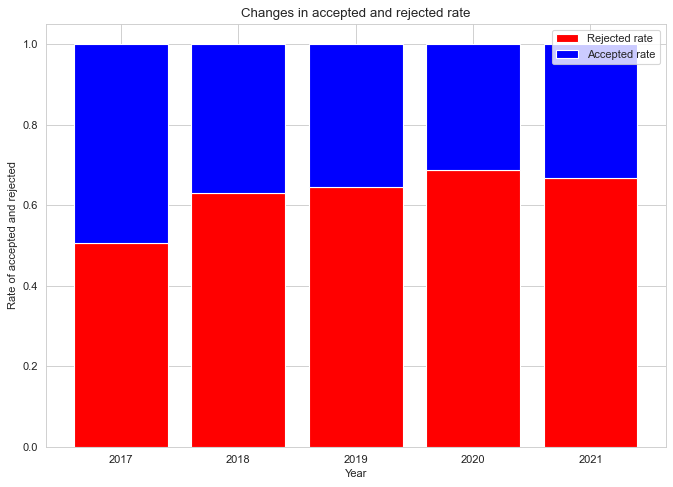

In [239]:
#Changes in accepted and rejected rate
figure(figsize=(10, 7), dpi=80)
xpos =['2017', '2018', '2019', '2020', '2021']
height1 = [0.5052410901467506,
 0.6311745334796927,
 0.6462297392529951,
 0.6877541798463624,
 0.6685934489402697]
height2 = [0.4947589098532495,
 0.36882546652030734,
 0.3537702607470049,
 0.3122458201536376,
 0.33140655105973027]

plt.bar(xpos, height1, color = 'red', label = 'Rejected rate')
plt.bar(xpos, height2, bottom = height1, color = 'blue', label = 'Accepted rate')

plt.xlabel('Year')
plt.ylabel('Rate of accepted and rejected')
plt.title('Changes in accepted and rejected rate')
plt.legend()


### multivariate 

In [240]:
# average rating of papers that accept/reject 
print(dfpaper.loc[(dfpaper['decision'] != "Reject") & (dfpaper['decision'] != np.nan)].describe())
print(dfpaper[dfpaper['decision'] == 'Reject']['average rating'].map(float).describe())

       average rating
count     2587.000000
mean         6.500510
std          0.722337
min          2.333300
25%          6.000000
50%          6.500000
75%          7.000000
max          9.666700
count    4989.000000
mean        4.496966
std         1.160507
min         1.000000
25%         4.000000
50%         4.666700
75%         5.333300
max         7.333300
Name: average rating, dtype: float64


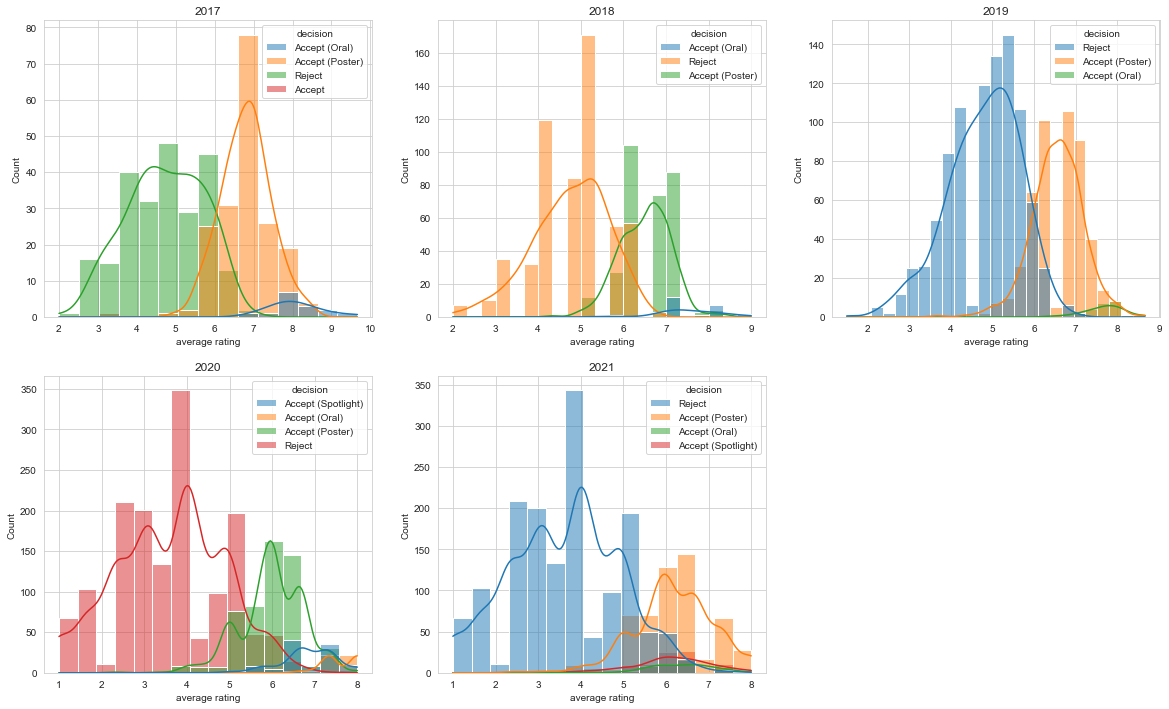

In [241]:
fig, ax= plt.subplots(2, 3, figsize=(20, 12))

sns.histplot(data=paper17, x="average rating", kde=True, hue="decision", ax=ax[0, 0])
sns.histplot(data=paper18, x="average rating", kde=True, hue="decision", ax=ax[0, 1])
sns.histplot(data=paper19, x="average rating", kde=True,hue="decision", ax=ax[0, 2])
sns.histplot(data=paper20, x="average rating", kde=True, hue="decision", ax=ax[1, 0])
sns.histplot(data=paper21, x="average rating", kde=True, hue="decision", ax=ax[1, 1])
sns.set_style("whitegrid")
ax[0, 0].set_title("2017")
ax[0, 1].set_title("2018")
ax[0, 2].set_title("2019")
ax[1, 0].set_title("2020")
ax[1, 1].set_title("2021")
fig.delaxes(ax[1,2])

In [242]:
# the paper accepted by 'poster' & its keywords
posterkw=dfpaper.query("decision== 'Accept (Poster)' ")['keywords']
posterkw=posterkw.str.split(',',expand=True).stack().reset_index(level=1,drop=True).reset_index(name='keywords')
posterkw = posterkw['keywords'].replace("' ","'").replace("'",'').str.strip().apply(lambda x: x.lower())


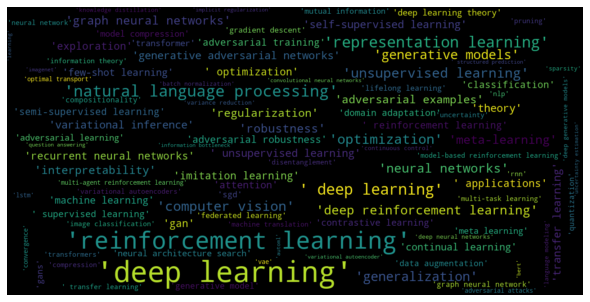

In [243]:
from imageio import imread
from wordcloud import WordCloud
wc = WordCloud(mode="RGBA", max_words=100, max_font_size=64, 
               width=1280, height=640, random_state=0)
wc.generate_from_frequencies(posterkw.value_counts())
fig = plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)



In [244]:
#21
paper21copy=paper21[['decision','average rating']]
old=['Accept (Oral)','Accept (Poster)','Invite to Workshop Track','Accept','Accept (Talk)', 'Accept (Spotlight)']
new=['Accept','Accept','Accept','Accept','Accept','Accept',]
paper21copy=paper21copy.replace(old,new)
paper21copy=pd.get_dummies(paper21copy, columns=['decision'],drop_first=True)
paper21copy=paper21copy.dropna()
paper21copy

,average rating,decision_Reject
0,6.6667,1
1,8.0000,1
2,6.6667,0
3,5.6667,1
4,6.6667,0
...,...,...
2208,4.6667,1
2209,4.0000,1
2210,2.3333,1
2211,4.0000,1


In [245]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
paper21copy = paper21copy.to_numpy()
# ----
# Data
# ----
x_train = np.array(paper21copy[:,1])
y_train = np.array(paper21copy[:,0])

In [246]:
# ------------------------------------
# Build your logistic regression model
# ------------------------------------
log_reg = LogisticRegression()
log_reg.fit(x_train.reshape(-1, 1),(y_train).astype(np.int))

<ipython-input-246-959bda90711b>:5: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



LogisticRegression()

In [247]:
# --------------------------
# Calculate model parameters
# --------------------------
beta0 = log_reg.intercept_[0]
beta1 = log_reg.coef_[0][0]

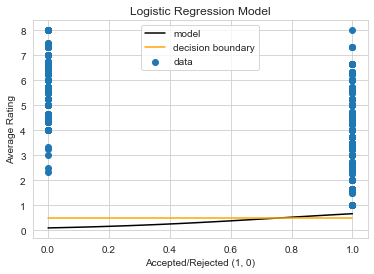

In [248]:

# ---------------
# Plot your model
# ---------------

x = np.linspace(1, 0, 100).reshape(-1, 1)
y = 1/(1 + np.exp(-(beta0+beta1*x)))

plt.scatter(x_train,y_train, label = 'data')
plt.plot(x, y, color = 'black', label = 'model')
plt.plot(x, np.ones(100) * 0.5, color = 'orange', label = 'decision boundary')

plt.xlabel('Accepted/Rejected (1, 0)')
plt.ylabel('Average Rating')
plt.title('Logistic Regression Model')
plt.legend()

### Keywords

### univariate 

In [249]:
#17 keyword
kw17 = paper17["keywords"].str.split(',',expand=True).stack().reset_index(level=1,drop=True).reset_index(name='keywords')
kw17['keywords'] = kw17['keywords'].str.replace("'",'').str.strip().apply(lambda x: x.lower())
keywords17= kw17.groupby(by='keywords').agg({"keywords":"count"})
keywords17.columns = ['number']
keywords17 =keywords17.reset_index()
kwresult17 = keywords17.sort_values(by='number',ascending=False).iloc[:30]
kwresult17.reset_index(inplace=True,drop=True)
#18 keyword
kw18 = paper18["keywords"].str.split(',',expand=True).stack().reset_index(level=1,drop=True).reset_index(name='keywords')
kw18['keywords'] = kw18['keywords'].str.replace("'",'').str.strip().apply(lambda x: x.lower())
keywords18= kw18.groupby(by='keywords').agg({"keywords":"count"})
keywords18.columns = ['number']
keywords18 =keywords18.reset_index()
kwresult18 = keywords18.sort_values(by='number',ascending=False).iloc[[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
#19 keyword
kw19 = paper19["keywords"].str.split(',',expand=True).stack().reset_index(level=1,drop=True).reset_index(name='keywords')
kw19['keywords'] = kw19['keywords'].str.replace("'",'').str.strip().apply(lambda x: x.lower())
keywords19= kw19.groupby(by='keywords').agg({"keywords":"count"})
keywords19.columns = ['number']
keywords19 =keywords19.reset_index()
kwresult19 = keywords19.sort_values(by='number',ascending=False).iloc[[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
kwresult19.reset_index(inplace=True,drop=True)
#20 keyword
kw20 = paper20["keywords"].str.split(',',expand=True).stack().reset_index(level=1,drop=True).reset_index(name='keywords')
kw20['keywords'] = kw20['keywords'].str.replace("'",'').str.strip().apply(lambda x: x.lower())
keywords20= kw20.groupby(by='keywords').agg({"keywords":"count"})
keywords20.columns = ['number']
keywords20 =keywords20.reset_index()
kwresult20 = keywords20.sort_values(by='number',ascending=False).iloc[[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
kwresult20.reset_index(inplace=True,drop=True)
#21 keyword
kw21 = paper21["keywords"].str.split(',',expand=True).stack().reset_index(level=1,drop=True).reset_index(name='keywords')
kw21['keywords'] = kw21['keywords'].str.replace("'",'').str.strip().apply(lambda x: x.lower())
keywords21= kw21.groupby(by='keywords').agg({"keywords":"count"})
keywords21.columns = ['number']
keywords21 =keywords21.reset_index()
kwresult21 = keywords21.sort_values(by='number',ascending=False).iloc[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
kwresult21.reset_index(inplace=True,drop=True)

In [250]:
# plot
kw17fig = px.bar(kwresult17, x='keywords', y='number', labels={'number':'count'},color='number', title='ICLR 2017 Submission Top Keywords', text='number')
kw17fig.update_layout(yaxis={'categoryorder':'total ascending'})
kw17fig.update_xaxes(tickangle=-30)
kw18fig = px.bar(kwresult18, x='keywords',y='number', labels={'number':'count'},color='number', title='ICLR 2018 Submission Top Keywords', text='number')
kw18fig.update_layout(yaxis={'categoryorder':'total ascending'})
kw18fig.update_xaxes(tickangle=-30)
kw19fig = px.bar(kwresult19, x='keywords', y='number', labels={'number':'count'},color='number', title='ICLR 2019 Submission Top Keywords', text='number')
kw19fig.update_layout(yaxis={'categoryorder':'total ascending'})
kw19fig.update_xaxes(tickangle=-30)
kw20fig = px.bar(kwresult20, x='keywords',  y='number', labels={'number':'count'}, color='number',title='ICLR 2020 Submission Top Keywords', text='number')
kw20fig.update_layout(yaxis={'categoryorder':'total ascending'})
kw20fig.update_xaxes(tickangle=-30)
kw21fig = px.bar(kwresult21, x='keywords',  y='number', labels={'number':'count'}, color='number',title='ICLR 2021 Submission Top Keywords', text='number')
kw21fig.update_layout(yaxis={'categoryorder':'total ascending'})
kw21fig.update_xaxes(tickangle=-30)



kw17fig


In [251]:
kw18fig

In [252]:
kw19fig

In [253]:
kw20fig

In [254]:
kw21fig

### multivariate

In [196]:
paper21['average rating'].replace("0", np.nan)

0       6.6667
1       8.0000
2       6.6667
3       5.6667
4       6.6667
         ...  
2590       NaN
2591       NaN
2592       NaN
2593       NaN
2594       NaN
Name: average rating, Length: 2595, dtype: float64

In [107]:
# 2021 avg rating by keywords
kwresult21=keywords21.sort_values(by='number',ascending=False)
kwresult21.reset_index(inplace=True,drop=True)
kwrating=[]
for i in range(len(kwresult21['keywords'])):
    avg_rating=[]
    for x in range(len(paper21['keywords'])):
        if kwresult21['keywords'][i] in paper21['keywords'][x]:
            avg_rating.append(paper21['average rating'][x])
    kwrating.append(np.nanmean(avg_rating))

kwresult21['avg_rating']=kwrating
rating_frequency=kwresult21[1:21]
rating_frequency

<ipython-input-107-386cc83589e6>:10: RuntimeWarning:

Mean of empty slice



,keywords,number,avg_rating
1,deep learning,213,4.511156
2,reinforcement learning,203,4.592453
3,representation learning,120,4.492755
4,robustness,71,4.379092
5,graph neural networks,68,4.319731
6,meta-learning,60,4.245192
7,generalization,59,4.683906
8,self-supervised learning,58,4.826672
9,unsupervised learning,56,4.789852
10,neural networks,51,4.411490


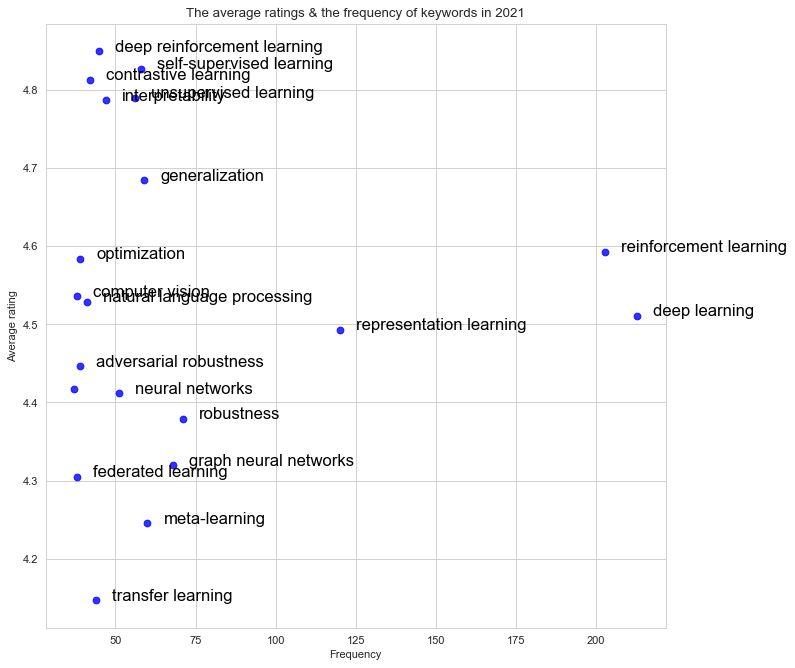

In [186]:
# https://github.com/shaohua0116/ICLR2020-OpenReviewData
#https://www.python-graph-gallery.com/46-add-text-annotation-on-scatterplot
# 2021 avg rating by keywords
figure(figsize=(10, 10), dpi=80)
sns.set_style('whitegrid')
sns.regplot(data=rating_frequency, x="number", y="avg_rating", fit_reg=False,marker="o", color="blue")
for line in range(1,rating_frequency.shape[0]):
    plt.text(rating_frequency["number"][line]+5, rating_frequency["avg_rating"][line], 
             rating_frequency['keywords'][line], 
             horizontalalignment='left', size=15, color='black', weight='light')
plt.xlabel('Frequency')
plt.ylabel('Average rating')
plt.title('The average ratings & the frequency of keywords in 2021')
plt.show()


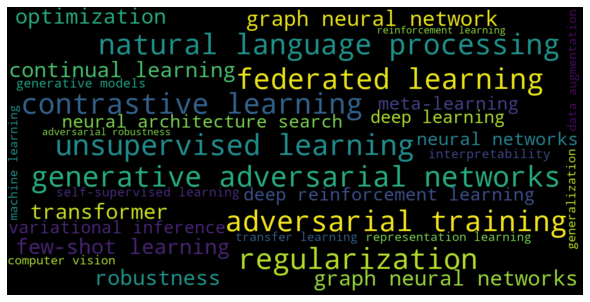

In [255]:
# word cloud: paper accepted by poster 
from imageio import imread
from wordcloud import WordCloud
wc = WordCloud(mode="RGBA", max_words=300, max_font_size=64, 
               width=1280, height=640, random_state=0)
wc.generate_from_frequencies(kwresult21['keywords'].value_counts())
fig = plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)


## abstract

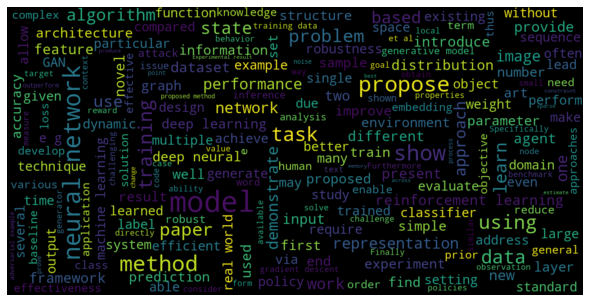

In [256]:
#word cloud: column abstract
# limitation: not phrase, just single word.
abstract=list(dfpaper.abstract)
abstract=''.join(abstract)
wc = WordCloud(mode="RGBA", max_words=200, max_font_size=64, 
               width=1280, height=640, random_state=0)
wc.generate(abstract)
fig = plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)


### title

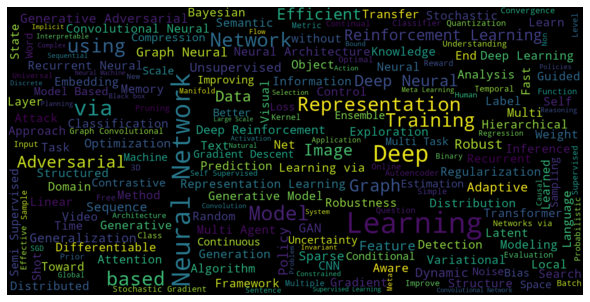

In [257]:
#word cloud: column abstract
title=list(dfpaper.title)
title=''.join(title)
wc = WordCloud(mode="RGBA", max_words=200, max_font_size=64, 
               width=1280, height=640, random_state=0)
wc.generate(title)
fig = plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)